# Overfitting a Decision Tree

One of the issues with a decision tree is that you can easily ovefit it. Let's look at an example to see how changing the depth of different decision trees affects overfitting. We'll create some random data with some noise and see how a decision can help make the prediction using different depth levels.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Create a random data set that builds the sine curve
rng = np.random.RandomState(42)

# Create 80 random data points for X
# range from 0 to 5
X = np.sort(5*rng.rand(80,1), axis=0)

In [3]:
# Look at X
X

array([[0.02761059],
       [0.10292247],
       [0.17194261],
       [0.22613644],
       [0.23225206],
       [0.29041806],
       [0.32525796],
       [0.37022326],
       [0.37275322],
       [0.44246251],
       [0.48836057],
       [0.5793453 ],
       [0.61019117],
       [0.6974693 ],
       [0.70462112],
       [0.7799726 ],
       [0.7800932 ],
       [0.85262062],
       [0.90912484],
       [0.91702255],
       [0.92427228],
       [0.97991431],
       [0.99357841],
       [0.99836891],
       [1.06169555],
       [1.29389991],
       [1.35674516],
       [1.40467255],
       [1.4561457 ],
       [1.46072324],
       [1.52121121],
       [1.52306885],
       [1.55855538],
       [1.62665165],
       [1.78376663],
       [1.79232864],
       [1.83180922],
       [1.87270059],
       [1.94338645],
       [2.15972509],
       [2.20076247],
       [2.28034992],
       [2.47588455],
       [2.57117219],
       [2.60034011],
       [2.62378216],
       [2.71348042],
       [2.733

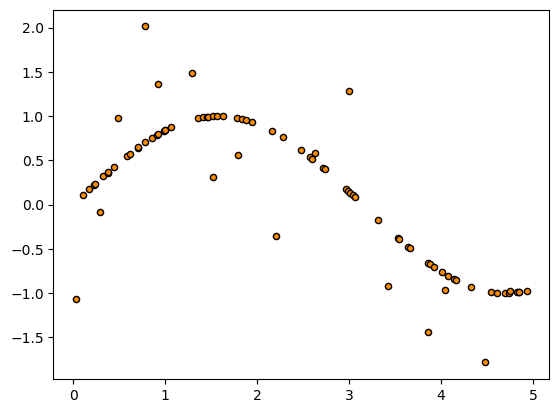

In [4]:
# Create y (the target) which will be the sine curve
y = np.sin(X).ravel()

# Now add some noise (randomness) to the curve at every 5th element
y[::5] += 3 * (0.5 - rng.rand(16))

# plot the X and y to see our noisy data
plt.scatter(X, y, s=20, edgecolor="black",
           c="darkorange", label="data");

In [5]:
# Fit a decision tree with max_depth=2
reg1 = DecisionTreeRegressor(max_depth=2)
reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [6]:
# Create a X_test data set
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Predict using decision tree regressor
y_1 = reg1.predict(X_test)

In [7]:
# see what y_1 looks like
y_1

array([ 0.06983713,  0.06983713,  0.06983713,  0.06983713,  0.06983713,
        0.06983713,  0.06983713,  0.06983713,  0.06983713,  0.06983713,
        0.06983713,  0.06983713,  0.06983713,  0.06983713,  0.06983713,
        0.06983713,  0.06983713,  0.06983713,  0.06983713,  0.06983713,
        0.06983713,  0.06983713,  0.06983713,  0.06983713,  0.06983713,
        0.06983713,  0.06983713,  0.06983713,  0.06983713,  0.06983713,
        0.06983713,  0.06983713,  0.06983713,  0.06983713,  0.06983713,
        0.06983713,  0.06983713,  0.06983713,  0.06983713,  0.06983713,
        0.06983713,  0.73314441,  0.73314441,  0.73314441,  0.73314441,
        0.73314441,  0.73314441,  0.73314441,  0.73314441,  0.73314441,
        0.73314441,  0.73314441,  0.73314441,  0.73314441,  0.73314441,
        0.73314441,  0.73314441,  0.73314441,  0.73314441,  0.73314441,
        0.73314441,  0.73314441,  0.73314441,  0.73314441,  0.73314441,
        0.73314441,  0.73314441,  0.73314441,  0.73314441,  0.73

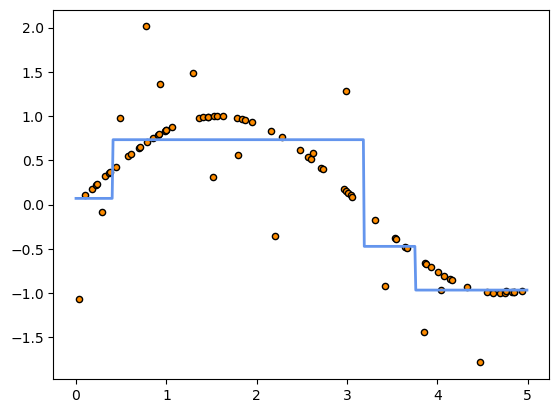

In [8]:
# plot the data and the max_depth=2
# plot the X and y to see our noisy data
plt.scatter(X, y, s=20, edgecolor="black",
           c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
        label="max_depth=2", linewidth=2);

## Try Depth of 6

This should give us a more flexible predictor.

In [9]:
# Let's try a new decision tree with max_depth=6
reg2 = DecisionTreeRegressor(max_depth=6)
reg2.fit(X, y)

# Make predictions with this new tree
y_2 = reg2.predict(X_test)

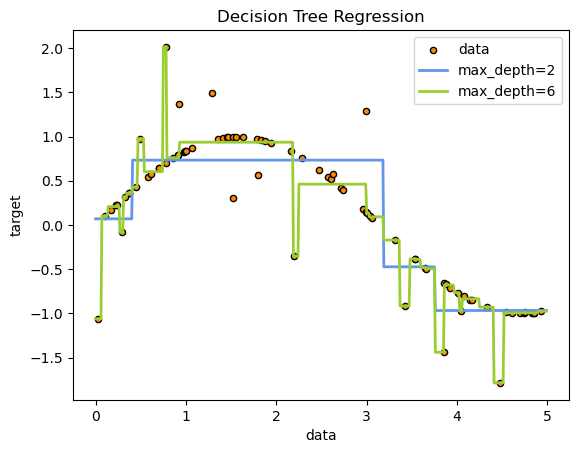

In [10]:
# plot the data and the max_depth=2 decision tree and the max_depth=6 tree
plt.scatter(X, y, s=20, edgecolor="black",
           c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
        label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen",
        label="max_depth=6", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend();

## Try the Full Tree

Simply do not use the argument `max_depth` to build the full tree.

In [11]:
# What if we let it build the full tree
reg3 = DecisionTreeRegressor()
reg3.fit(X, y)

# predict using the full tree
y_3 = reg3.predict(X_test)

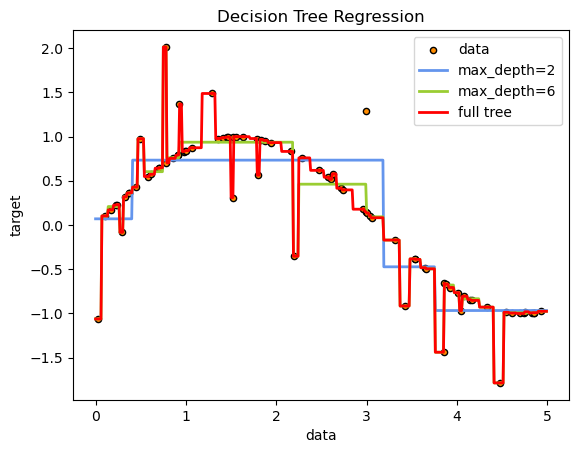

In [12]:
# plot the data and the max_depth=2 decision tree and the max_depth=6 tree
plt.scatter(X, y, s=20, edgecolor="black",
           c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
        label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen",
        label="max_depth=6", linewidth=2)
plt.plot(X_test, y_3, color="red",
        label="full tree", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend();

In [13]:
# what does the resulting tree look like?
from sklearn.tree import export_text
print(export_text(reg3))

|--- feature_0 <= 3.19
|   |--- feature_0 <= 0.41
|   |   |--- feature_0 <= 0.07
|   |   |   |--- value: [-1.06]
|   |   |--- feature_0 >  0.07
|   |   |   |--- feature_0 <= 0.31
|   |   |   |   |--- feature_0 <= 0.26
|   |   |   |   |   |--- feature_0 <= 0.14
|   |   |   |   |   |   |--- value: [0.10]
|   |   |   |   |   |--- feature_0 >  0.14
|   |   |   |   |   |   |--- feature_0 <= 0.20
|   |   |   |   |   |   |   |--- value: [0.17]
|   |   |   |   |   |   |--- feature_0 >  0.20
|   |   |   |   |   |   |   |--- feature_0 <= 0.23
|   |   |   |   |   |   |   |   |--- value: [0.22]
|   |   |   |   |   |   |   |--- feature_0 >  0.23
|   |   |   |   |   |   |   |   |--- value: [0.23]
|   |   |   |   |--- feature_0 >  0.26
|   |   |   |   |   |--- value: [-0.08]
|   |   |   |--- feature_0 >  0.31
|   |   |   |   |--- feature_0 <= 0.35
|   |   |   |   |   |--- value: [0.32]
|   |   |   |   |--- feature_0 >  0.35
|   |   |   |   |   |--- feature_0 <= 0.37
|   |   |   |   |   |   |--- value

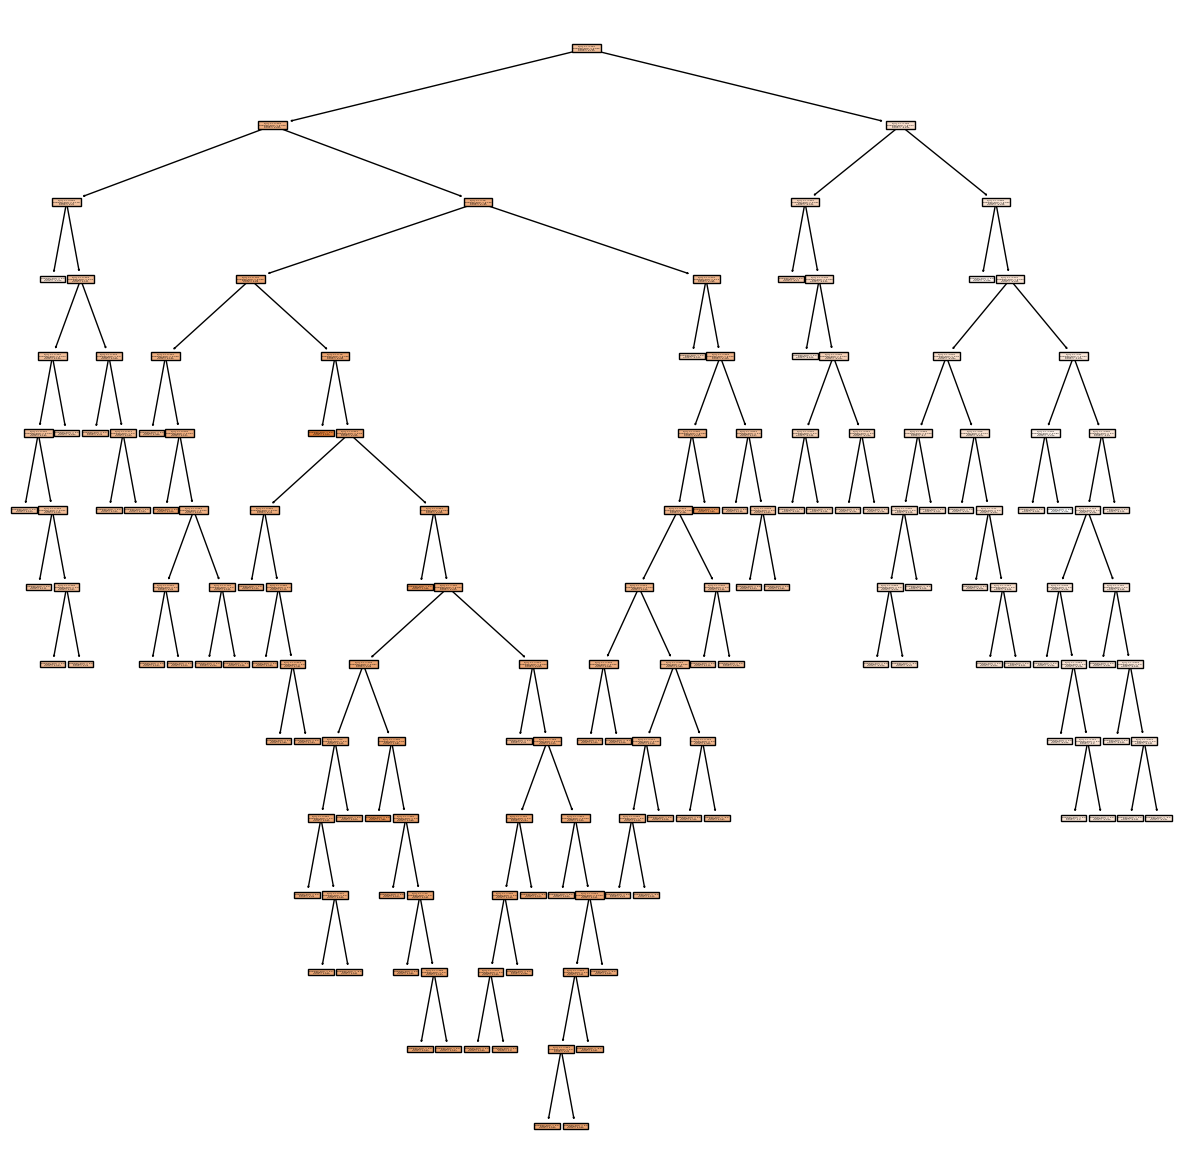

In [14]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15,15))
plot_tree(reg3, filled=True);

## Pruning

Instead of explicitly setting the `max_depth`, you can try pruning with the `ccp_alpha` argument.

In [15]:
# How about pruning?
# ccp_alpha=0.1 looks like?
reg4 = DecisionTreeRegressor(ccp_alpha=0.1)
reg4.fit(X, y)

# Predict for this tree
y_4 = reg4.predict(X_test)

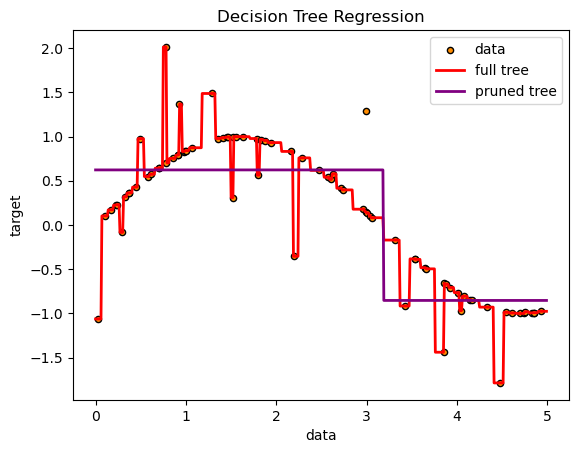

In [16]:
# plot the data and the max_depth=2 decision tree and the max_depth=6 tree
plt.scatter(X, y, s=20, edgecolor="black",
           c="darkorange", label="data")

plt.plot(X_test, y_3, color="red",
        label="full tree", linewidth=2)
plt.plot(X_test, y_4, color="purple",
        label="pruned tree", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend();

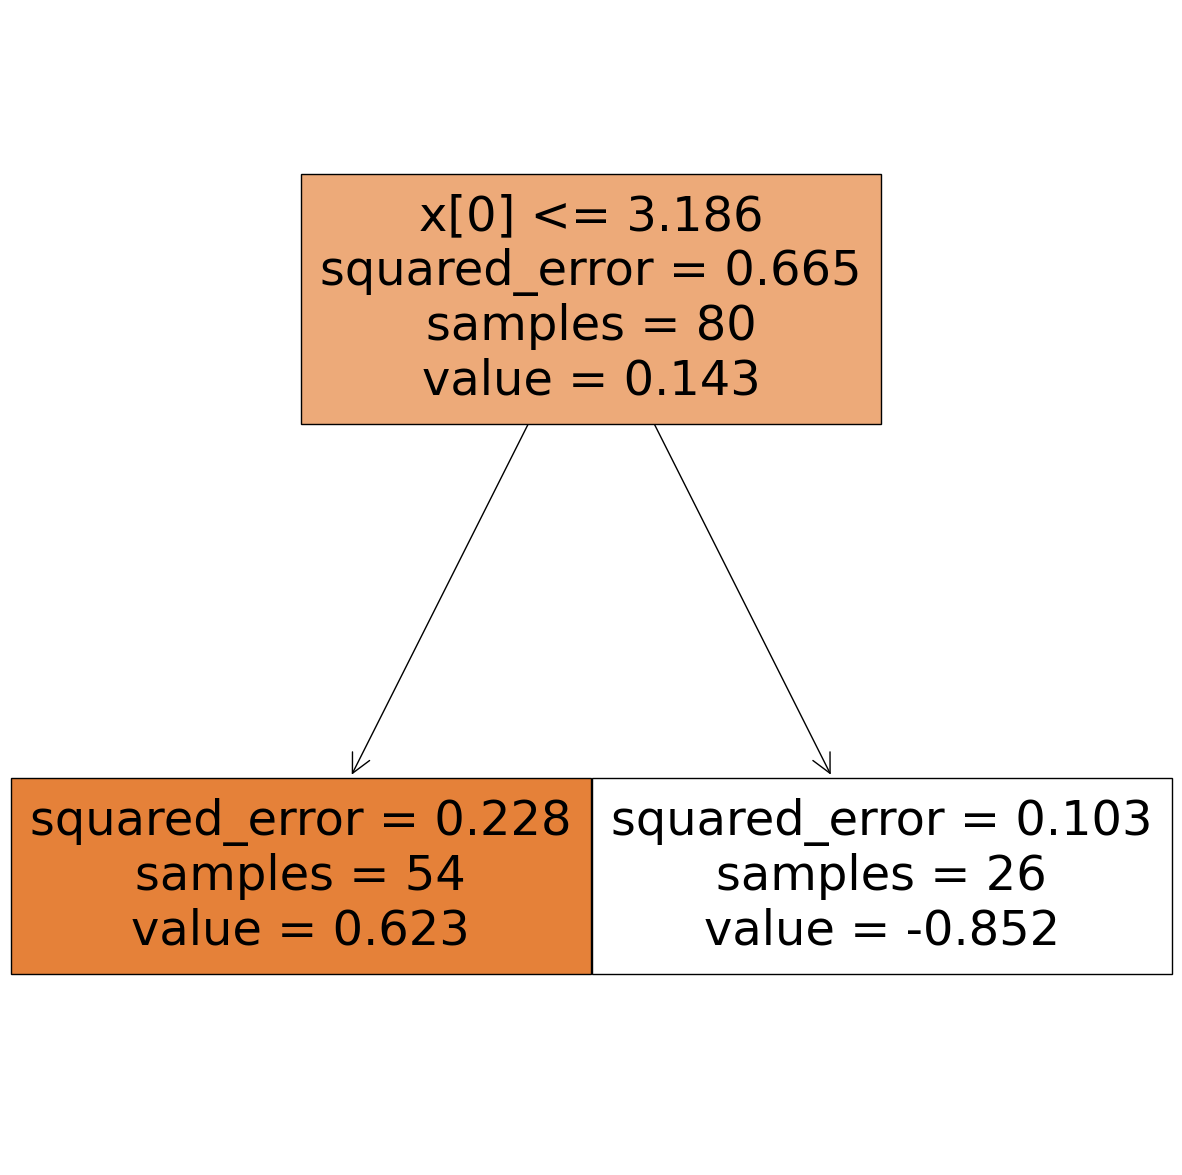

In [17]:
fig = plt.figure(figsize=(15,15))
plot_tree(reg4, filled=True);

### Try a Different Value for `ccp_alpha`



In [18]:
reg5 = DecisionTreeRegressor(ccp_alpha=0.01)
reg5.fit(X, y)

# Predict for this tree
y_5 = reg5.predict(X_test)

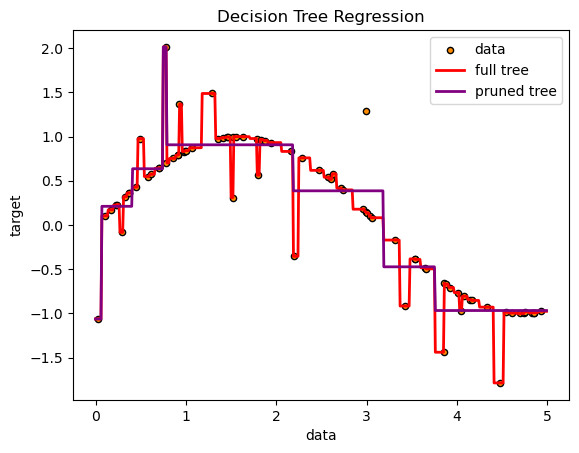

In [19]:
# plot the data and the 
plt.scatter(X, y, s=20, edgecolor="black",
           c="darkorange", label="data")

plt.plot(X_test, y_3, color="red",
        label="full tree", linewidth=2)
plt.plot(X_test, y_5, color="purple",
        label="pruned tree", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend();